In [1]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import time
import scipy
import numpy as np
from PIL import Image

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


In [2]:
# set file path for x-ray
test_folder = 'data/test'
train_folder = 'data/train'
val_folder = 'data/val'

In [3]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, 
        target_size=(64, 64), batch_size = 624 ) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, 
        target_size=(64, 64), batch_size = 16)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, 
        target_size=(64, 64), batch_size = 5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
print(train_labels)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 64, 64, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 64, 64, 3)
test_labels shape: (624, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 12288)
(624, 12288)
(16, 12288)


In [8]:

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [9]:
#Baseline model

In [10]:
# Importing the libraries for modeling
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
baseline = models.Sequential()
baseline.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
baseline.add(layers.Dense(7, activation='relu'))
baseline.add(layers.Dense(5, activation='relu'))
baseline.add(layers.Dense(1, activation='sigmoid'))

In [12]:
baseline.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = baseline.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=16,
                    validation_data=(val_img, val_y), verbose = 1)

Train on 5216 samples, validate on 16 samples
Epoch 1/20
5216/5216 [==============================] - 2s 400us/step - loss: 0.4246 - accuracy: 0.8085 - val_loss: 0.6164 - val_accuracy: 0.7500
Epoch 2/20
5216/5216 [==============================] - 1s 228us/step - loss: 0.2656 - accuracy: 0.8923 - val_loss: 0.4456 - val_accuracy: 0.8125
Epoch 3/20
5216/5216 [==============================] - 2s 403us/step - loss: 0.2024 - accuracy: 0.9225 - val_loss: 0.5388 - val_accuracy: 0.8125
Epoch 4/20
5216/5216 [==============================] - 1s 264us/step - loss: 0.1831 - accuracy: 0.9262 - val_loss: 0.8253 - val_accuracy: 0.6250
Epoch 5/20
5216/5216 [==============================] - 2s 337us/step - loss: 0.1654 - accuracy: 0.9329 - val_loss: 1.0173 - val_accuracy: 0.6250
Epoch 6/20
5216/5216 [==============================] - 1s 221us/step - loss: 0.1469 - accuracy: 0.9431 - val_loss: 0.3601 - val_accuracy: 0.8750
Epoch 7/20
5216/5216 [==============================] - 1s 235us/step - loss: 

In [13]:
results_train = baseline.evaluate(train_img, train_y)

5216/5216 [==============================] - 0s 80us/step


In [14]:

results_train

[0.12208872864399951, 0.9516870975494385]

In [15]:
results_val = baseline.evaluate(val_img, val_y)

16/16 [==============================] - 0s 115us/step


In [16]:
results_val

[0.18429481983184814, 0.9375]

In [17]:
baseline.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                245780    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


In [19]:
history.history

{'val_loss': [0.6163514256477356,
  0.44555485248565674,
  0.5388286113739014,
  0.8253260254859924,
  1.017345666885376,
  0.360135555267334,
  0.23922839760780334,
  0.2332519292831421,
  0.22228369116783142,
  1.0521509647369385,
  0.48009437322616577,
  0.8681616187095642,
  0.9466309547424316,
  0.28224873542785645,
  0.22288398444652557,
  0.5532747507095337,
  0.42511510848999023,
  0.6398032903671265,
  0.6617944240570068,
  0.18429481983184814],
 'val_accuracy': [0.75,
  0.8125,
  0.8125,
  0.625,
  0.625,
  0.875,
  0.9375,
  0.9375,
  0.9375,
  0.625,
  0.8125,
  0.6875,
  0.625,
  0.9375,
  0.9375,
  0.75,
  0.8125,
  0.6875,
  0.6875,
  0.9375],
 'loss': [0.4245501087258564,
  0.2655543124680322,
  0.20236456087373333,
  0.18310413762150002,
  0.16540977523656436,
  0.14689537861235896,
  0.1364670042305659,
  0.14065349047597886,
  0.1360034174414386,
  0.13801269258581034,
  0.1300405627745061,
  0.11830079751632011,
  0.12509216929563075,
  0.12355771181430736,
  0.1169

In [25]:

baseline.layers[0]

In [26]:
baseline.pop()
print(len(baseline.layers))

3


In [29]:
baseline.layers[0].weights 

[<tf.Variable 'dense_1/kernel:0' shape=(12288, 20) dtype=float32, numpy=
 array([[ 0.00372605, -0.01118482,  0.01275494, ..., -0.02228718,
         -0.01478739,  0.00345732],
        [-0.01972964,  0.01270043,  0.00563179, ..., -0.00154435,
          0.00709551, -0.00606644],
        [-0.00217308, -0.00744307,  0.00175725, ..., -0.02206127,
          0.00560648,  0.00336778],
        ...,
        [ 0.00614996, -0.00646607,  0.00014355, ..., -0.01663862,
         -0.01019997, -0.00110065],
        [ 0.00607884, -0.00339909,  0.00136689, ..., -0.01568427,
         -0.00480423, -0.00947611],
        [-0.00647677, -0.00545094, -0.01248519, ..., -0.00137382,
         -0.01809815, -0.01067608]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(20,) dtype=float32, numpy=
 array([ 4.3965777e-04, -9.5470739e-04, -2.7143717e-04, -7.9567508e-05,
         8.2918033e-03, -4.2236134e-04, -1.4941572e-05, -1.2836424e-06,
         0.0000000e+00,  9.6821766e-03,  0.0000000e+00, -4.2283253e-04,
   

In [30]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

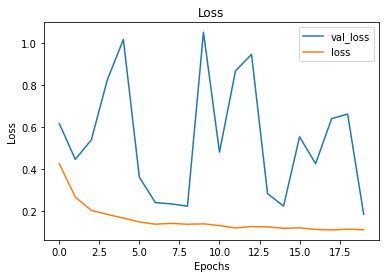

KeyError: 'val_acc'

<Figure size 432x288 with 0 Axes>

In [33]:
visualize_training_results(history)

In [18]:
# when I don't have library
#import sys
#!{sys.executable} -m pip install pillow